# 1. Démo d'utilisation Markdown et HTML

## Why Jupyter lab?
### Code speaks louder than words!
#### It's even better with some Markdown and images.

<h1 style="color: teal;">Hello, HTML in Jupyter!</h1>
<p>This is a <strong>paragraph</strong> with <span style="color: red;">red text</span>.</p>
<ul>
  <li>List item 1</li>
  <li>List item 2</li>
</ul>
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/6/61/HTML5_logo_and_wordmark.svg/800px-HTML5_logo_and_wordmark.svg.png" width="150">


# 2. Démo d'utilisation ollama dans python

In [1]:
import ollama
def chat_with_ollama(model: str, messages: list[dict], temperature: float = 0.7):
    response = ollama.chat(
        model=model,
        messages=messages,
        options={
            'temperature': temperature
        }
    )
    return response['message']['content']

# Exemple de format prompts (identique à celui d'OpenAI)
prompts = [
    {'role': 'system', 'content': 'You are a helpful assistant.'},
    {'role': 'user', 'content': 'Who is Xudong Zhao at HENIX?'}
]

# Appeler le modèle local Ollama
reply = chat_with_ollama('mistral', prompts, temperature=0.7)
print(reply)

 Xudong Zhao is a researcher and scientist at the High Energy Stereoscopic System (HENrix), which is a Cherenkov Telescope Array (CTA) Consortium Institutional Member Organization (IMO) based in China. He specializes in studying high-energy gamma rays and cosmic rays using ground-based observatories like HENrix/CTA. His research focuses on understanding the origins of these high-energy particles, as well as uncovering new insights into astrophysics and particle physics.


# 3. Présentation de Embedding et Chunking

In [3]:
import ollama
import textwrap

# 🔹 Exemple de texte brut
text = """
HENIX Acteur de référence en France en Qualité Logicielle, Agilité et DevOps. Notre mission est de développer des outils & services 
pour aider nos clients à structurer leur transition numérique ou à maîtriser leur patrimoine applicatif, en développant les compétences 
et technicités de nos consultants au sein de filières pérennes et valorisées. Edition de Squash - Modèle Open Core Partenaire Select et 
Technology Alliance de GitLab. Partenaire Gold d'Atlassian.
"""
print(f"📜 Longueur totale du texte : {len(text)} caractères\n")

# 🔹 Découpage en chunks simples (fixe 200 caractères + 50 chevauchement)
def split_text(text, chunk_size=200, overlap=50):
    start = 0
    chunks = []
    text_length = len(text)
    
    while start < text_length:
        end = start + chunk_size
        chunks.append(text[start:end])
        # Si end dépasse la longueur du texte, arrêter la boucle
        if end > text_length:
            break
        start += chunk_size - overlap
    return chunks

chunks = split_text(text)

all_embeddings = []
# 🔹 Génération des embeddings pour chaque chunk
for i, chunk in enumerate(chunks):
    print(f"🧩 Chunk {i+1} (longueur {len(chunk)} caractères) :\n{textwrap.fill(chunk, width=80)}\n")

    result = ollama.embeddings(model='nomic-embed-text', prompt=chunk)
    embedding = result['embedding']
    all_embeddings.append(embedding)
    print(f"🔢 Embedding ({len(embedding)} nombres, premiers 5) : {embedding[:5]}")
    print("\n" + "="*80 + "\n")   


📜 Longueur totale du texte : 468 caractères

🧩 Chunk 1 (longueur 200 caractères) :
 HENIX Acteur de référence en France en Qualité Logicielle, Agilité et DevOps.
Notre mission est de développer des outils & services  pour aider nos clients à
structurer leur transition numérique ou à

🔢 Embedding (768 nombres, premiers 5) : [-0.27677804231643677, 0.6078073978424072, -3.3437154293060303, -1.0372519493103027, 1.372207760810852]


🧩 Chunk 2 (longueur 200 caractères) :
lients à structurer leur transition numérique ou à maîtriser leur patrimoine
applicatif, en développant les compétences  et technicités de nos consultants au
sein de filières pérennes et valorisées. E

🔢 Embedding (768 nombres, premiers 5) : [-0.2067025899887085, 0.33740735054016113, -3.5451927185058594, -1.0278160572052002, 1.1430201530456543]


🧩 Chunk 3 (longueur 168 caractères) :
ants au sein de filières pérennes et valorisées. Edition de Squash - Modèle Open
Core Partenaire Select et  Technology Alliance de GitLab. Parte

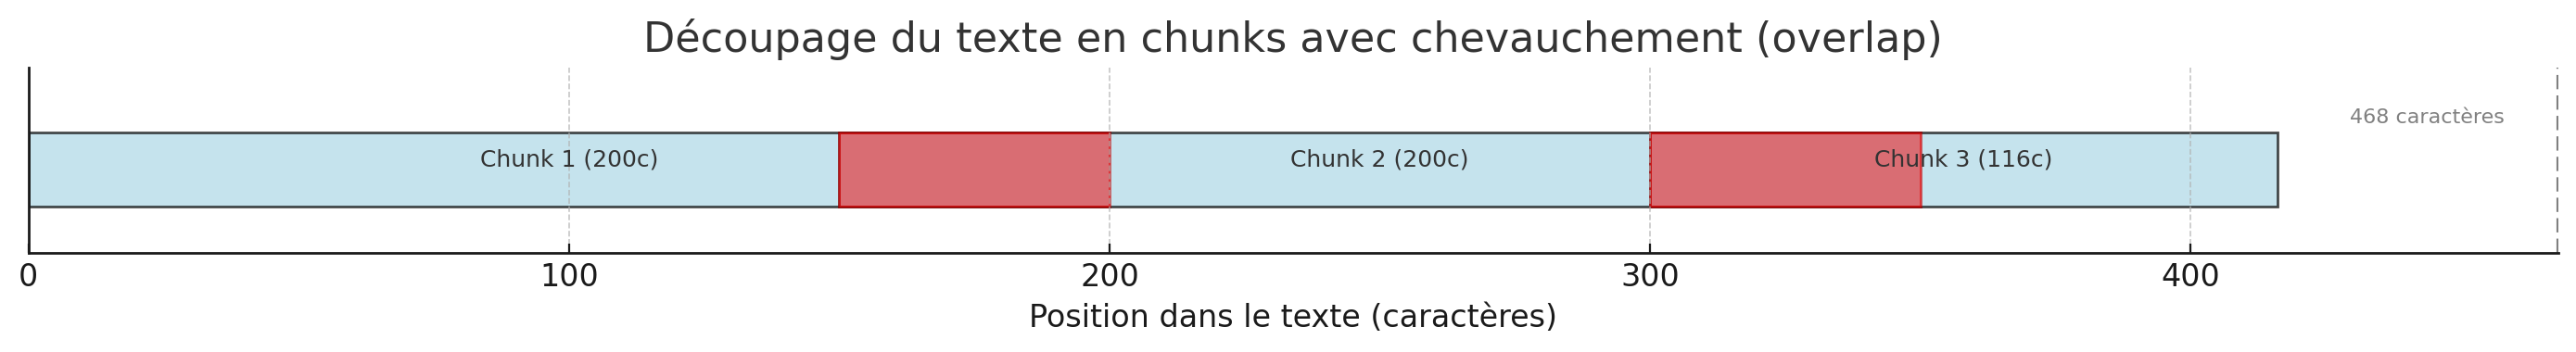

# 4. Présentation de cosine similarity

In [4]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

# 🔎 Exemple de requête utilisateur
query = "transition numérique et compétences des consultants"
query_embedding = ollama.embeddings(model='nomic-embed-text', prompt=query)['embedding']
# 🔍 Affichage partiel 
print(f"\n🔢 Query Embedding ({len(query_embedding)} dimensions) - premiers 10 éléments :")
print(query_embedding[:10])

# 🧠 Calcul de la similarité cosinus entre la requête et chaque chunk
similarities = cosine_similarity([query_embedding], all_embeddings)[0]

# 🔝 Récupérer les indices des chunks les plus similaires (ex : top 2)
top_k = 2
top_indices = np.argsort(similarities)[::-1][:top_k]

# 🔍 Affichage des résultats les plus pertinents
print("\n🎯 Résultats les plus similaires à la requête :")
for i in top_indices:
    print(f"\n🧩 Chunk {i+1} (similarité: {similarities[i]:.4f}) :\n{textwrap.fill(chunks[i], width=80)}")



🔢 Query Embedding (768 dimensions) - premiers 10 éléments :
[-1.3183356523513794, 0.07959423959255219, -3.8446197509765625, -0.3940061032772064, 1.443468689918518, -0.32860082387924194, 0.07433761656284332, -0.10600674152374268, -0.7472943663597107, 0.5693066120147705]

🎯 Résultats les plus similaires à la requête :

🧩 Chunk 2 (similarité: 0.8564) :
lients à structurer leur transition numérique ou à maîtriser leur patrimoine
applicatif, en développant les compétences  et technicités de nos consultants au
sein de filières pérennes et valorisées. E

🧩 Chunk 1 (similarité: 0.7609) :
 HENIX Acteur de référence en France en Qualité Logicielle, Agilité et DevOps.
Notre mission est de développer des outils & services  pour aider nos clients à
structurer leur transition numérique ou à


# 3. Présentation de Gradio

In [5]:
# une méthode simple

def shout(text):
    return text.upper()

In [7]:
import gradio as gr
view = gr.Interface(
    fn=shout, 
    inputs=[gr.Textbox(label="Your message:", lines=6)],
    outputs=[gr.Textbox(label="Response:", lines=8)],
   flagging_mode="never"
)
view.launch(share=True)

* Running on local URL:  http://127.0.0.1:7860
* Running on public URL: https://550cfe04e552596035.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


# 4. Combinaison d’Ollama avec Gradio

In [8]:
def chat_with_mistral(user_input: str, model: str = 'mistral', temperature: float = 0.7):
    messages = [
        {'role': 'system', 'content': 'Tu es un assistant utile.'},
        {'role': 'user', 'content': user_input}
    ]
    response = ollama.chat(
        model=model,
        messages=messages,
        options={'temperature': temperature}
    )
    return response['message']['content']

view = gr.Interface(
    fn=chat_with_mistral, 
    inputs=gr.Textbox(label="Votre message :", lines=6, placeholder="Veuillez saisir votre question..."),
    outputs=[gr.Textbox(label="Réponse :", lines=8)],
    flagging_mode="never"
)
view.launch(share=True)


* Running on local URL:  http://127.0.0.1:7861
* Running on public URL: https://cb6c42aefde7e750de.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
